In [23]:
%pip install tensorflow.keras tensorflow.keras.preprocessing.image tensorflow.keras.callbacks tensorflow.keras.utils tensorflow.keras.models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import load_model
import tensorflow as tf

  Using cached tensorflow_keras-0.1-py3-none-any.whl (5.2 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow.keras.preprocessing.image (from versions: none)
ERROR: No matching distribution found for tensorflow.keras.preprocessing.image

[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

label_names = sorted(os.listdir("C:/Users/rrawa/skin/Derm/train"))
label_map = {label: index for index, label in enumerate(label_names)}

def load_data(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_dir = os.path.join(data_dir, label)
        if os.path.isdir(label_dir):
            for img_name in os.listdir(label_dir):
                img_path = os.path.join(label_dir, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    labels.append(label_map[label])
    images = np.array(images, dtype="float32") / 255.0
    labels = to_categorical(np.array(labels), num_classes=len(label_names))
    return images, labels

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    r"C:\Users\rrawa\skin\Derm\train",
    target_size=(128, 128),
    color_mode="rgb",
    class_mode="categorical",
    subset="training"
)

val_gen = datagen.flow_from_directory(
    r"C:\Users\rrawa\skin\Derm\train",
    target_size=(128, 128),
    color_mode="rgb",
    class_mode="categorical",
    subset="validation"
)

label_names = list(train_gen.class_indices.keys())
print("Detected classes:", label_names)

label_names = list(train_gen.class_indices.keys())



Found 2224 images belonging to 5 classes.
Found 554 images belonging to 5 classes.
Detected classes: ['Blackheads', 'Cyst', 'Papules', 'Pustules', 'Whiteheads']


In [26]:
disease_treatment = {
    "Acne and Rosacea Photos": "Use benzoyl peroxide, salicylic acid creams, or consult a dermatologist.",
    "Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions": "Seek immediate dermatologist consultation.",
    "Atopic Dermatitis Photos": "Apply moisturizers, hydrocortisone cream for flare-ups.",
    "Bullous Disease Photos": "Consult dermatologist, may require corticosteroid treatment.",
    "Cellulitis Impetigo and other Bacterial Infections": "Antibiotics may be required. Visit a doctor immediately.",
    "Eczema Photos": "Moisturize frequently, avoid harsh soaps, apply topical steroids if prescribed.",
    "Exanthems and Drug Eruptions": "Stop suspected drug, seek urgent medical care.",
    "Hair Loss Photos Alopecia and other Hair Diseases": "Minoxidil, hair serums, consult dermatologist for evaluation.",
    "Herpes HPV and other STDs Photos": "Antiviral treatment may be required. Seek medical advice.",
    "Light Diseases and Disorders of Pigmentation": "Use sunscreen, depigmenting creams, dermatology consultation.",
    "Lupus and other Connective Tissue diseases": "Needs rheumatologist/dermatologist care, avoid sunlight.",
    "Melanoma Skin Cancer Nevi and Moles": "Possible skin cancer. Seek urgent dermatologist consultation.",
    "Nail Fungus and other Nail Disease": "Antifungal creams or oral antifungals may be required.",
    "Poison Ivy Photos and other Contact Dermatitis": "Wash skin, apply calamine lotion, antihistamines.",
    "Psoriasis pictures Lichen Planus and related diseases": "Moisturizers, coal tar, corticosteroid creams.",
    "Scabies Lyme Disease and other Infestations and Bites": "Apply permethrin cream, wash clothing/bedding.",
    "Seborrheic Keratoses and other Benign Tumors": "Usually harmless, consult dermatologist if changing.",
    "Systemic Disease": "Skin symptoms linked to internal disease. Seek full medical evaluation.",
    "Tinea Ringworm Candidiasis and other Fungal Infections": "Antifungal creams or oral antifungal medications.",
    "Urticaria Hives": "Take antihistamines, avoid allergens/triggers.",
    "Vascular Tumors": "Consult dermatologist, treatment depends on severity.",
    "Vasculitis Photos": "Requires urgent medical attention, possible immunosuppressive therapy.",
    "Warts Molluscum and other Viral Infections": "Salicylic acid, cryotherapy, consult dermatologist."
}
for cls in label_names:
    if cls not in disease_treatment:
        disease_treatment[cls] = "Consult a dermatologist for treatment advice."



In [27]:
import json
with open("dermnet_training_history.json", "r") as f:
    history_data = json.load(f)
model = load_model("dermnet_skin_disease_model.keras")

In [28]:
from tensorflow.keras.models import load_model
import pickle

model = load_model("dermnet_skin_disease_model.keras")

with open("dermnet_training_history.pkl", "rb") as f:
    history_data = pickle.load(f)

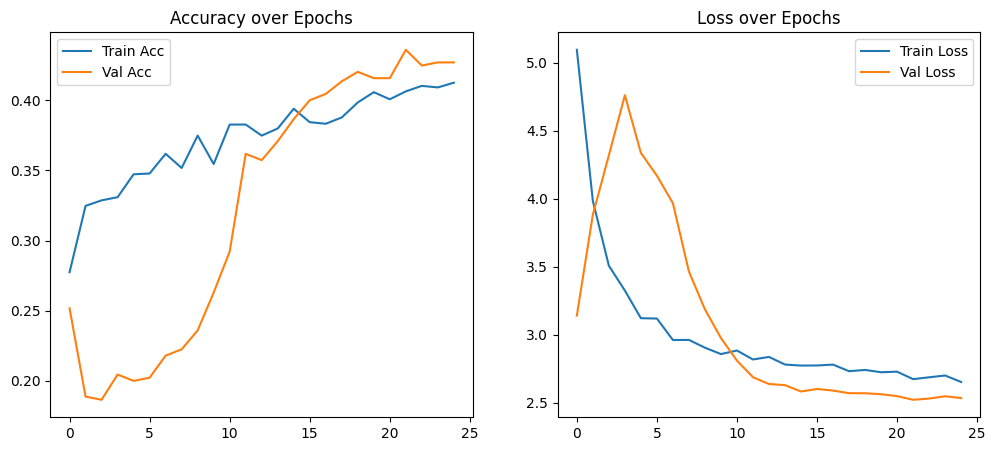

In [29]:

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_data["accuracy"], label="Train Acc")
plt.plot(history_data["val_accuracy"], label="Val Acc")
plt.legend()
plt.title("Accuracy over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history_data["loss"], label="Train Loss")
plt.plot(history_data["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss over Epochs")
plt.show()

In [30]:
test_images, test_labels = load_data("C:/Users/rrawa/skin/Derm/test")

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(model.predict(test_images), axis=-1)
y_true = np.argmax(test_labels, axis=-1)

print(classification_report(y_true, y_pred, target_names=label_names))

cm = confusion_matrix(y_true, y_pred)

29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step
              precision    recall  f1-score   support

  Blackheads       0.33      0.03      0.06       265
        Cyst       0.20      0.78      0.32       189
     Papules       0.00      0.00      0.00       202
    Pustules       0.27      0.19      0.22       205
  Whiteheads       0.86      0.32      0.46        57

    accuracy                           0.23       918
   macro avg       0.33      0.26      0.21       918
weighted avg       0.25      0.23      0.16       918



c:\Users\rrawa\Downloads\PBL\vml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rrawa\Downloads\PBL\vml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rrawa\Downloads\PBL\vml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step


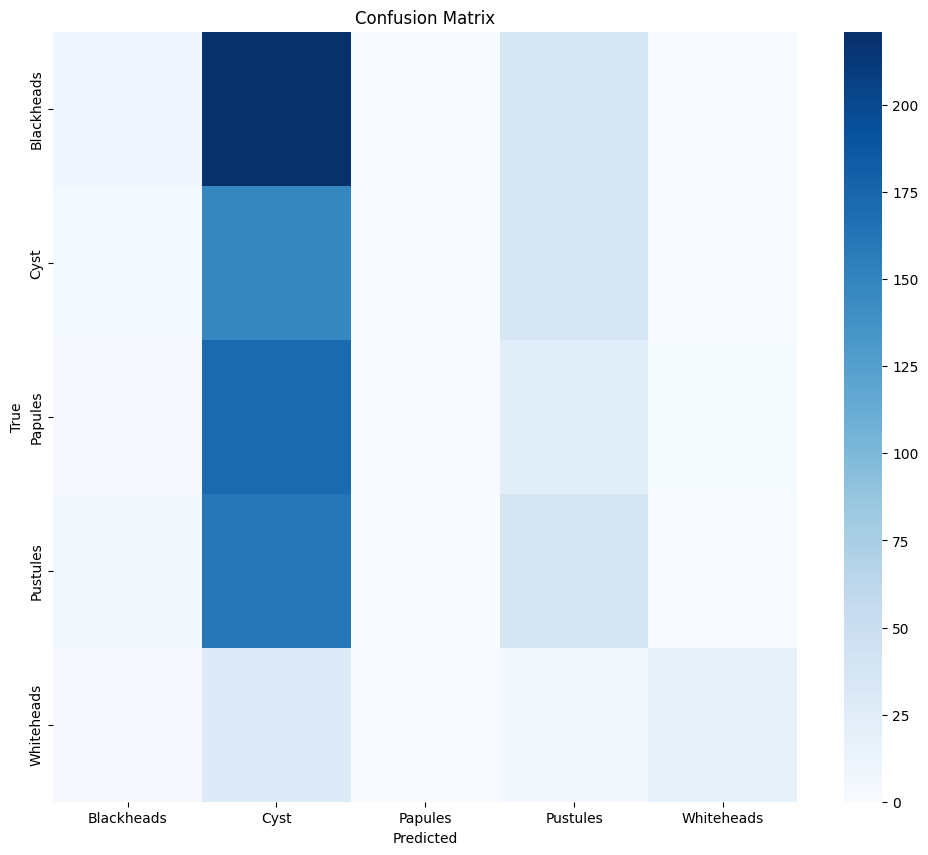

In [31]:

y_pred = np.argmax(model.predict(test_images), axis=-1)
y_true = np.argmax(test_labels, axis=-1)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [32]:

print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

  Blackheads       0.33      0.03      0.06       265
        Cyst       0.20      0.78      0.32       189
     Papules       0.00      0.00      0.00       202
    Pustules       0.27      0.19      0.22       205
  Whiteheads       0.86      0.32      0.46        57

    accuracy                           0.23       918
   macro avg       0.33      0.26      0.21       918
weighted avg       0.25      0.23      0.16       918



c:\Users\rrawa\Downloads\PBL\vml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rrawa\Downloads\PBL\vml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\rrawa\Downloads\PBL\vml\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


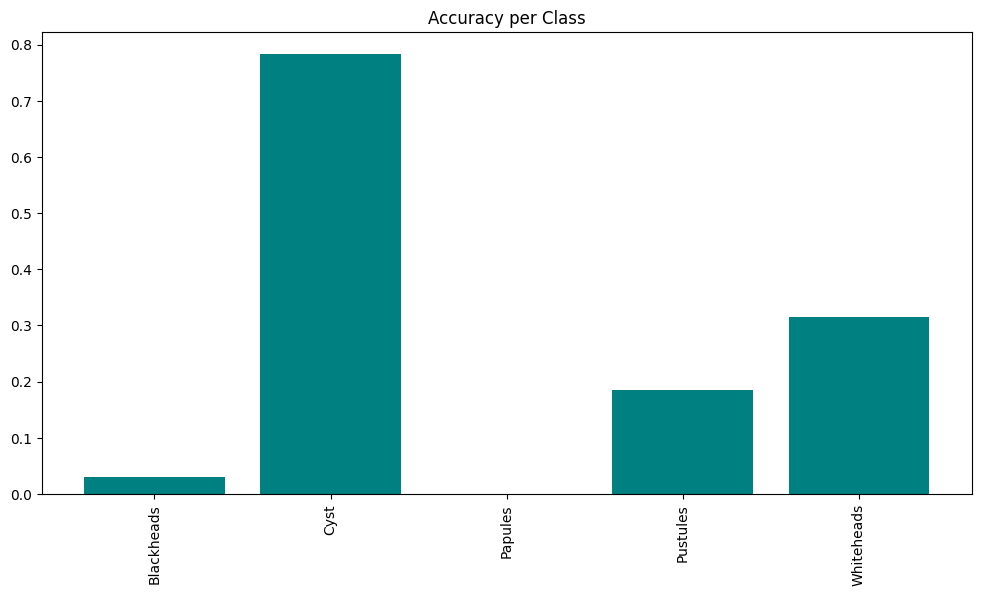

In [33]:

class_acc = np.diag(cm) / np.sum(cm, axis=1)
plt.figure(figsize=(12, 6))
plt.bar(label_names, class_acc, color="teal")
plt.xticks(rotation=90)
plt.title("Accuracy per Class")
plt.show()

In [34]:
%pip install pyttsx3
import cv2
import numpy as np
import pyttsx3
import time
import webbrowser

engine = pyttsx3.init()

def predict_disease(frame, threshold=0.3):
    img = cv2.resize(frame, (128, 128))
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    confidence = np.max(prediction)
    pred_class = np.argmax(prediction, axis=-1)[0]
    pred_label = label_names[pred_class]

    if confidence >= threshold:
        return pred_label, confidence
    return None, confidence

def speak_suggestion(disease):
    if disease in disease_treatment:
        suggestion = disease_treatment[disease]
    else:
        suggestion = "No treatment suggestion available."
    engine.say(f"The detected condition is {disease}. Suggested treatment: {suggestion}")
    engine.runAndWait()
    return suggestion

disease_treatment = {
    "Acne and Rosacea Photos": {
        "advice": "Use benzoyl peroxide or salicylic acid creams.",
        "link": "https://www.1mg.com/search/all?name=benzoyl%20peroxide%20cream"
    },
    "Scabies Lyme Disease and other Infestations and Bites": {
        "advice": "Apply permethrin cream, wash clothing/bedding.",
        "link": "https://www.1mg.com/search/all?name=permethrin%20cream"
    },
    "Psoriasis pictures Lichen Planus and related diseases": {
        "advice": "Coal tar shampoo or corticosteroid creams.",
        "link": "https://www.1mg.com/search/all?name=coal%20tar%20cream"
    },
    "Melanoma Skin Cancer Nevi and Moles": {
        "advice": "Possible skin cancer. Seek urgent dermatologist consultation.",
        "link": "https://www.google.com/search?q=melanoma+dermatologist"
    },
}

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import cv2
import numpy as np
import time
import webbrowser

# Initialize webcam
cap = cv2.VideoCapture(0)
last_prediction = None
prediction_start_time = None
last_speak_time = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break

    display_frame = cv2.resize(frame, (640, 480))
    pred_label, confidence = predict_disease(display_frame)

    if pred_label:
        label_text = f"{pred_label} ({confidence*100:.1f}%)"
        cv2.putText(display_frame, label_text, (20, 40),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

        treatment_text = str(disease_treatment.get(pred_label, "No treatment info available"))
        cv2.putText(display_frame, treatment_text, (20, 80),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

        # Speak suggestion every 5 seconds
        if time.time() - last_speak_time > 5:
            speak_suggestion(pred_label)
            last_speak_time = time.time()

        # Redirect only if prediction is stable for 3 seconds
        if pred_label == last_prediction:
            if prediction_start_time and time.time() - prediction_start_time > 3:
                query = f"{pred_label} treatment"
                webbrowser.open(f"https://www.google.com/search?q={query}")
                prediction_start_time = None  # Reset after redirect
        else:
            last_prediction = pred_label
            prediction_start_time = time.time()

    else:
        cv2.putText(display_frame, "No confident prediction",
                    (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        last_prediction = None
        prediction_start_time = None

    cv2.imshow("Skin Disease Detection", display_frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━